<a href="https://colab.research.google.com/github/raj-vijay/ml/blob/master/10_Regularized_Regression_Lasso_on_Gapminder_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regularized Regression - Lasso: Gapminder Data**

Linear regression minimizes the loss function. It choses a coefficient for each feature variable, and large coefficients can lead to overfitting. The process of penalizing large coefficients is called regularization. 

The linear regression model is simple and is commonly used as a prediction model.The linear regression model makes an assumption of normal distribution of error terms, i.e. the OLS (Ordinary Least Squares) estimators of the linear regression model are unbiased (Gauss-Markov Theorem). 

Linear regression fails under certain circumstances such as when there is a multicollinearity between the variables. 





**Multicollinearity** 

Multicollinearity is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. 

In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. 

That is, a multivariate regression model with collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others. 

**Regularization** 

Regularization is viewed as a technique to improve the generalizability of a learned model. 

Regularized regression is a type of regression where the coefficient estimates are constrained to zero. The magnitude (size) of coefficients, as well as the magnitude of the error term, are penalized. Complex models are discouraged, primarily to avoid overfitting. 

Regularization is a technique to assign penalties to certain models, that are overly complex. 

Ridge regression adds a penalty called an L2 penalty, which is the same as the square of the magnitude of coefficients. All coefficients are shrunk by the same factor, so that all coefficients remain in the model. The strength of the penalty term is controlled by a tuning parameter. When the tuning parameter (λ) is set to zero, ridge regression equals least squares regression. If λ = ∞, all coefficients are shrunk to zero. The ideal penalty is therefore somewhere in between 0 and ∞.

The other type of regularization, L1 regularization, limits the size of the coefficients by adding an L1 penalty equal to the absolute value of the magnitude of coefficients. This sometimes results in the elimination of some coefficients altogether leading to sparse models. 


**I. Ridge regression**

Ridge regression is a way to create a parsimonious model when the number of predictor variables in a set exceeds the number of observations, or when a data set has multicollinearity (correlations between predictor variables).

**II. Lasso regression (Least Absolute Shrinkage and Selection Operator: LASSO)**

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. This type is very useful in situations with high levels of muticollinearity or to automate certain parts of model selection, such as for variable selection or parameter elimination. 




The Gapminder Dataset describes life expentency depending on factors like fertility, GDP, Region, population etc.

The dataset is imported from Kaggle.

https://www.kaggle.com/

Installing Kaggle Package to access the Gapminder dataset from Kaggle.

In [0]:
!pip install kaggle

Make .kaggle directory under root to import the Kaggle Authentication JSON.

In [0]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Change file path to root/.kaggle/kaggle.json

In [0]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

Protect Kaggle JSON file for security reasons

Chmod 600 (chmod a+rwx,u-x,g-rwx,o-rwx) sets permissions so that, (U)ser / owner can read, can write and can't execute. (G)roup can't read, can't write and can't execute. (O)thers can't read, can't write and can't execute.

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

Import the Gapminder dataset

In [0]:
!kaggle datasets download -d deepakdodi/gapminder

gapminder.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the Gapminder file into a DataFrame: df
df = pd.read_csv('gapminder.zip', compression='zip', header=0, sep=',', quotechar='"')
print(df)

     population  fertility  ...  child_mortality                      Region
0    34811059.0       2.73  ...             29.5  Middle East & North Africa
1    19842251.0       6.43  ...            192.0          Sub-Saharan Africa
2    40381860.0       2.24  ...             15.4                     America
3     2975029.0       1.40  ...             20.0       Europe & Central Asia
4    21370348.0       1.96  ...              5.2         East Asia & Pacific
..          ...        ...  ...              ...                         ...
134   3350832.0       2.11  ...             13.0                     America
135  26952719.0       2.46  ...             49.2       Europe & Central Asia
136  86589342.0       1.86  ...             26.2         East Asia & Pacific
137  13114579.0       5.88  ...             94.9          Sub-Saharan Africa
138  13495462.0       3.85  ...             98.3          Sub-Saharan Africa

[139 rows x 10 columns]


Create array X for the 'fertility' feature and array y for the 'life' target variable.

In [0]:
# Create arrays for features and target variable
y = df['life'].values
X_fertility = df['fertility'].values

In [0]:
# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X_fertility.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)


**Lasso Regression on Gapminder Dataset**

Lasso regression is able to select features that are the most important for predicting the target values, while shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way is very useful in situations with data involving thousands of features.

Here, we fit a lasso regression to the Gapminder dataset to plot the coefficients. It can be observed that the coefficients of some features are shrunk to 0, with only the most important ones remaining.

In [0]:
X = df.drop(['life', 'Region'], axis=1)

Import Lasso from sklearn.linear_model

In [0]:
# Import Lasso
from sklearn.linear_model import Lasso

Instantiate a Lasso regressor with an alpha of 0.4 and specify normalize=True

In [0]:
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha = 0.4, normalize = True)

In [0]:
# Fit the regressor to the data
lasso_coef = lasso.fit(X, y).coef_

**Determining coefficients of various features of the Gapminder Dataset**

In [0]:
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


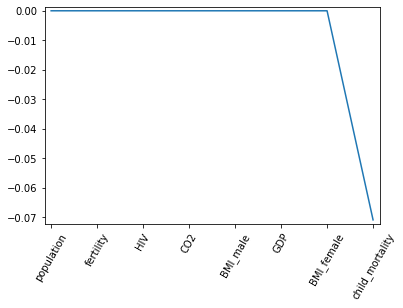

In [0]:
# Plot the coefficients
plt.plot(X.columns, lasso_coef)
plt.xticks(range(len(X.columns)), X.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

Now, it turns out that 'child_mortality' is the most important feature when predicting life expectancy. 

This definitely requires further investigation.